In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 7)

inspections = pd.read_csv('data/inspections.csv')

#  Categorical empirical distributions
---


The distribution of a categorical attribute is described by simply calculating the proportion of the whole made up by each value. Pandas provides a method called `value_counts` that calculates this quantity; the distribution is a series, indexed by the values of the attribute, with values given by each value's proportion.

**Example:** The empirical distribution of the `risk_category` attribute in the inspections dataset is given by:

In [4]:
(
    inspections['risk_category']
    .value_counts(normalize=True)                    # empirical distribution
    .loc[['Low Risk', 'Moderate Risk', 'High Risk']] # sort distribution by order of the values
)

Low Risk         0.473200
Moderate Risk    0.382112
High Risk        0.144688
Name: risk_category, dtype: float64

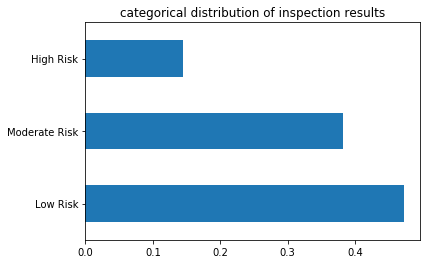

In [5]:
(
    inspections['risk_category']
    .value_counts(normalize=True)
    .plot(kind='barh', title='categorical distribution of inspection results')
);

*Remark 1:* As the  attribute is ordinal, the index of empirical distribution should be *sorted* to reflect the order of the values.

*Remark 2:* A horizontal bar chart has better formatting of values with long descriptions. Create vertical bar charts using the keyword `kind='bar'`.

**Example:** The empirical distribution of the postal code attribute in the inspections dataset is given by:

In [70]:
inspections['business_postal_code'].value_counts(normalize=True)

94110    0.119878
94103    0.089250
94109    0.071136
           ...   
95117    0.000027
94188    0.000027
95122    0.000027
Name: business_postal_code, Length: 44, dtype: float64

*Remark 1:* The ordering of the index of the empirical distribution is arbitrary, as the `business_postal_code` attribute is nominal.

*Remark 2:* This distribution reveals that 7 postal codes contain the majority of the health inspections in this dataset. Verify this! Why is this? Is it because health inspectors inspect restaurants in those areas more often? Or is it because there are more restaurants in those postal codes? Questions like these are the focus of the next chapter.

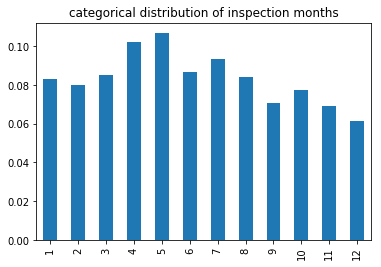

In [6]:
(
    inspections['month']
    .value_counts(normalize=True)
    .sort_index()
    .plot(kind='bar', title='categorical distribution of inspection months')
);

### Cumulative Distribution Functions

Cumulative distribution functions (CDF) are useful for understanding ordinal attributes within a range values. 

**Definition:** The CDF of an attribute at a value $x$ is the likelihood that an observed value is at most $x$.

**Example:** The letter grades assigned in a course order from A (highest) through F (lowest). The table below gives both 
1. the distribution of the letter grades of students (pdf) describes the proportion of the class that received each letter grade,
1. the cumulative distribution of the letter grades of students (cdf) describes the proportion of the class that received at most a given grade.

|Grade|count|pdf|cdf|
|---|---|---|---|
|F|2|0.03|0.03|
|D|5|0.07|0.10|
|C|25|0.43|0.53|
|B|23|0.33|0.86|
|A|10|0.14|1.00|

For example, 53% of the class received a C or lower.

In Pandas, the CDF is calculated from the distribution using the 'cumulative sum' (`cumsum`) method:
```
distribution = grades.value_counts(normalize=True)
cdf = distribution.sort_index(ascending=False).cumsum()
```

*Remark:* The use of `sort_index` is particular to this example, as the ordering of letter grades coincides with the reverse of python's default string sorting.